# Employee Attrition

#### Content
1. [Introduction: The Problem](#intro)
2. [Data](#data)
3. [Exploratory Data Analysis](#eda)
4. [Preprocessing & Analysis](#analysis)
5. [Hyper Parameter Tuning & Model Saving](#hyperparam)

## Introduction: The Problem <a name='intro'></a>

There are a lot of resources a firm has to employ in order to find competent employees to fill their
vacancies. With more and more people flooding the job market, the hiring process not only requires
money (in form of fees for screening softwares, consultancy fees, etc.), but also a lot of time.
Therefore, it is paramount for firms to retain the employees once they are found competent enough
and hired.

In order to achieve this, firms should be aware of the factors which cause existing employees to
leave and predict which employees are mostly like to leave. Identifying those likely to leave before
they resign will enable the firm to put proper practices/incentive in place in order to retain them
longer.

Given the dataset, we are presented with a supervised classification problem. Once proper data
cleaning (if required) is done and a model is trained, this model can be used to predict future
employee attrition. Over time as the dataset increase, the model can also improve its accuracy.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')

## Data <a name = "data"></a>

In [2]:
employeeDf = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employeeDf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employeeDf.shape

(1470, 35)

The data set has 1470 rows and 35 columns. The Target column for this project is the 'Attrition' column. We will perform exploratory data analysis to understand the data further.

## Exploratory Data Analysis <a name='eda'></a>

###### Univariate

In [4]:
employeeDf.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in this dataset.

In [5]:
employeeDf.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Although the columns Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction and WorkLifeBalance are int64, they can actually be treated as categorical as they represent the following information and hence can be treated as categorical data:

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

The rest of the columns appear to have the right datatypes.

In [6]:
#Changing the columns above into datatype object
employeeDf = employeeDf.astype({'Education': 'object', 'EnvironmentSatisfaction': 'object', 'JobInvolvement': 'object',
                               'JobSatisfaction': 'object', 'PerformanceRating': 'object', 'RelationshipSatisfaction': 'object',
                               'WorkLifeBalance' : 'object'})

In [7]:
employeeDf.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Making a list containing categorical variables
categoricalCols = [feature for feature in employeeDf.columns if employeeDf[feature].dtypes == 'O'][1::] #first element is Attrition so didnt include in the list
categoricalCols

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [9]:
#Making a list containing numerical variables
numericCols = [feature for feature in employeeDf.columns if employeeDf[feature].dtypes != 'O']
numericCols.remove('EmployeeNumber') # Removing EmployeeNumber because it is just a identification number and not important for this analysis
numericCols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Categorical Column Univariate Analysis

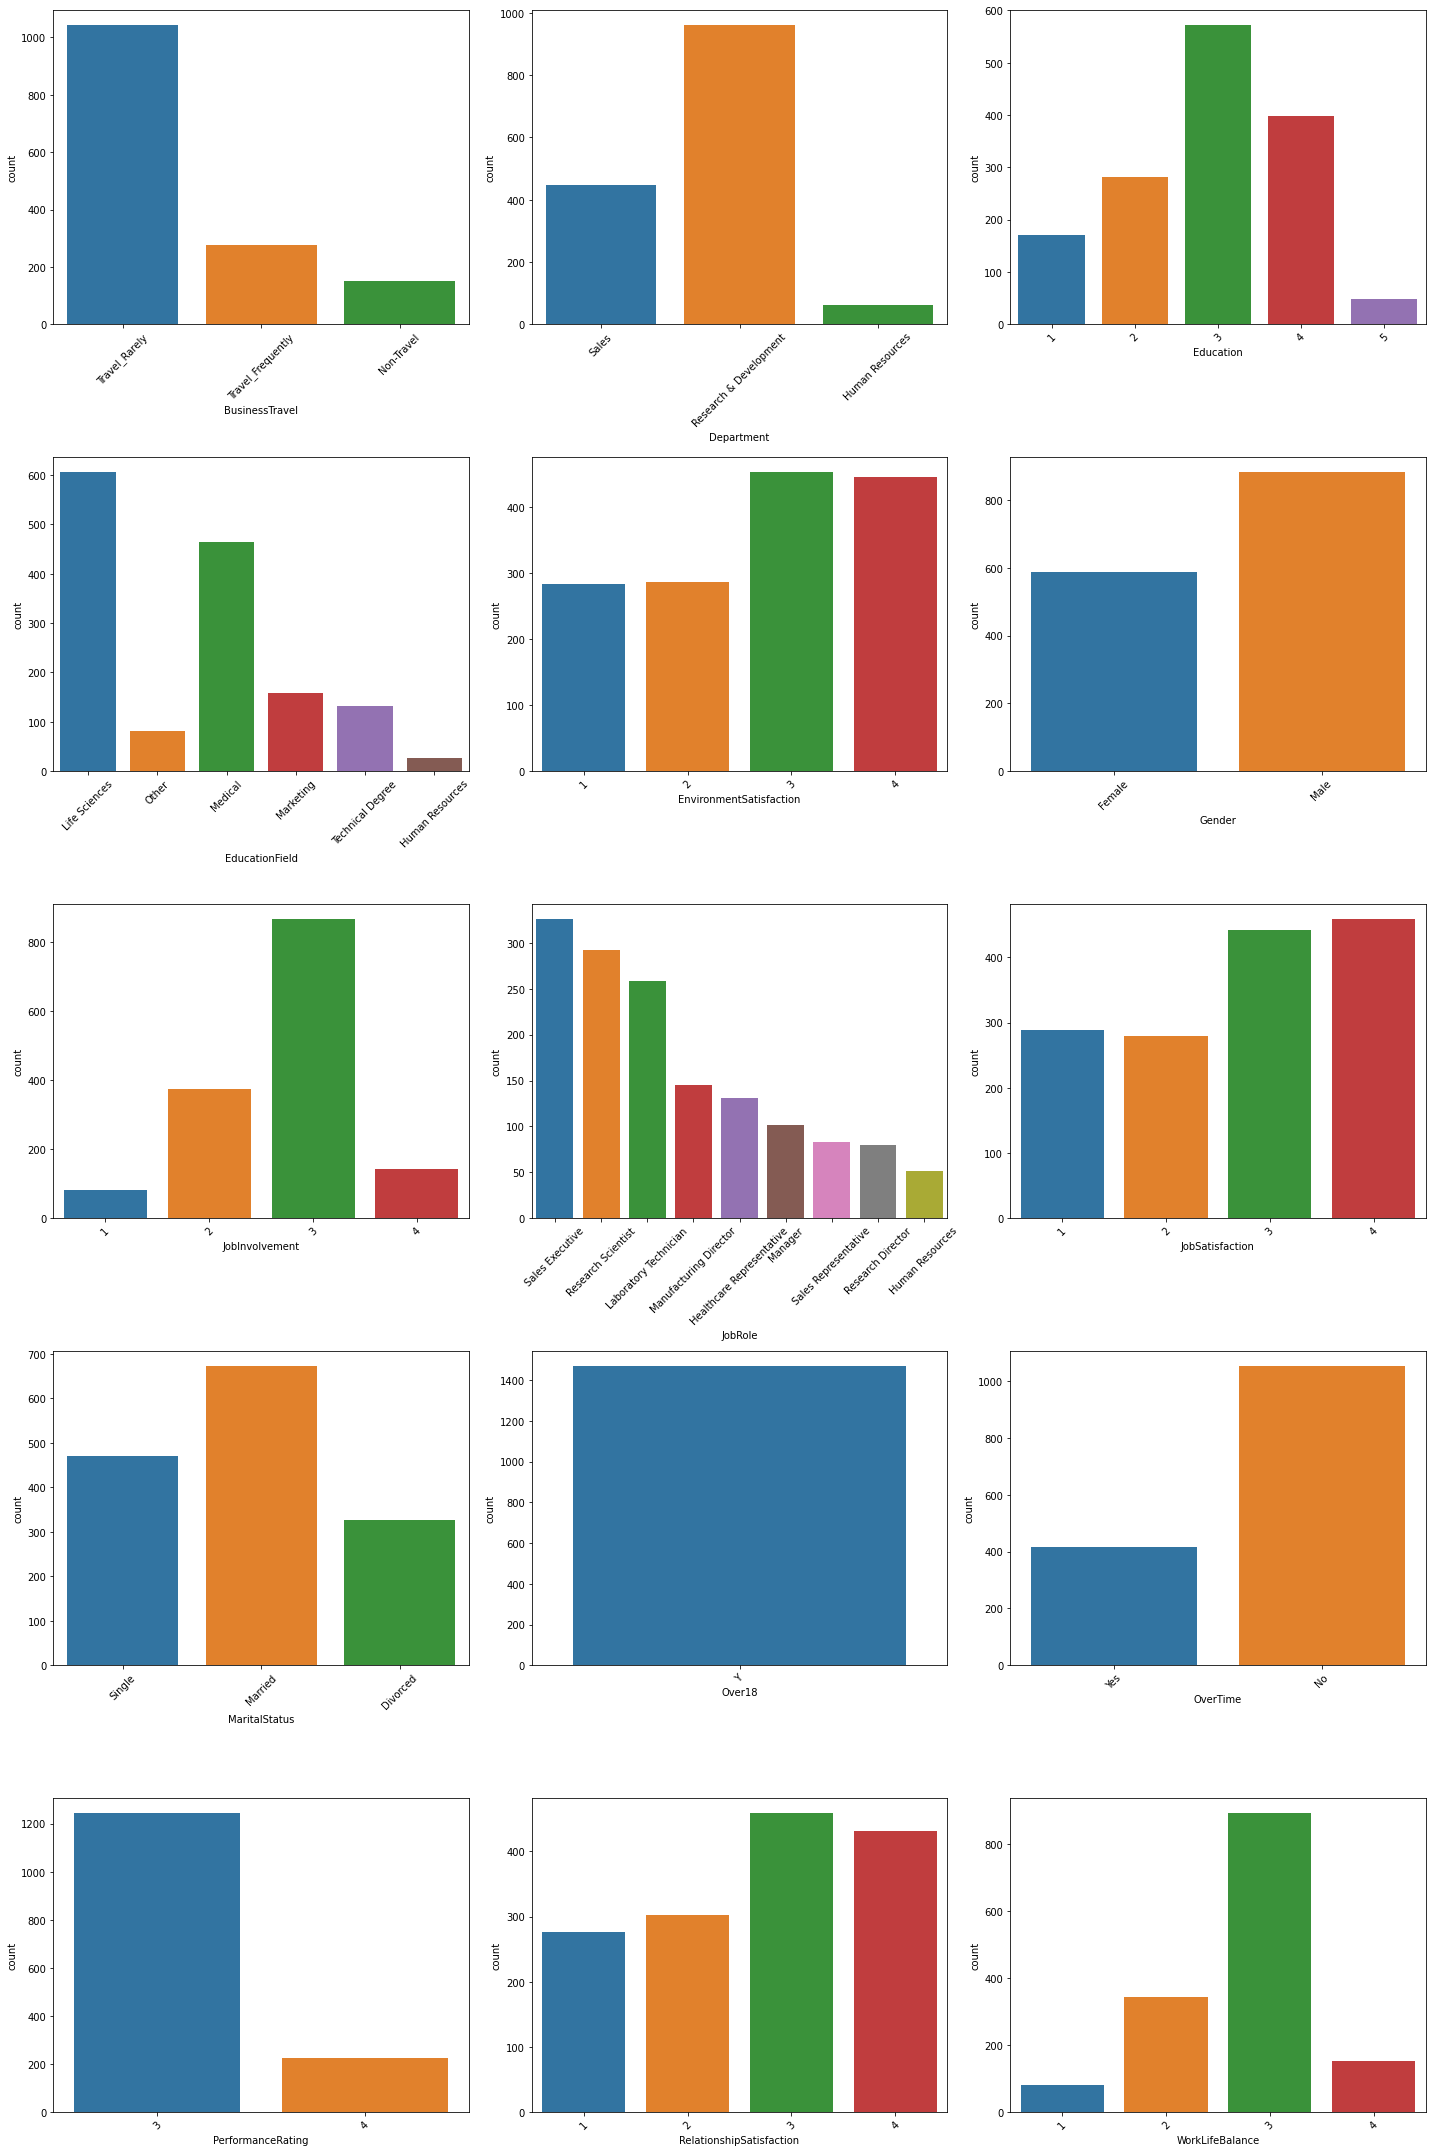

In [10]:
plt.figure(figsize=(20,30))

for index in range(len(categoricalCols)):
    plt.subplot(5,3, index+1)
    sns.countplot(employeeDf[categoricalCols[index]])
    plt.xlabel(categoricalCols[index])
    plt.xticks(rotation=45)
    plt.tight_layout()

From the above graphs we see that most employees travel rarely, are married, employed in the Research & Development department, have a Bachelor's degree and are from Life Sciences background. In gender, there are more male employees then female. Most have a PerformanceRating of 3 and have reported a 'Better' (3) WorkLifeBalance.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

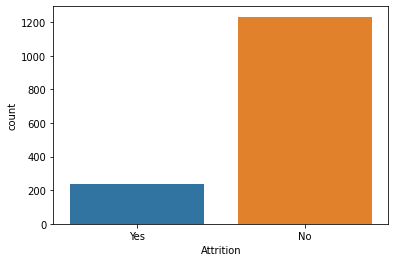

In [11]:
sns.countplot(employeeDf['Attrition'])

In the target column, there are more 'No' labels then 'Yes'. Therefore, we have an imbalanced dataset and needs to be balanced before it is used for model building.

Numeric Col Univariate Analysis

In [12]:
#Checking the summary statistics
employeeDf[numericCols].describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


From the above table notice the following:
1. The columns EmployeeCount and StandardHours have the same value in same values in all the rows.
2. Ouliers may be present in the columns MonthlyIncome, YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany,	YearsInCurrentRole, and TotalWorkingYears. We confirm this and remove outliers later in this analysis.

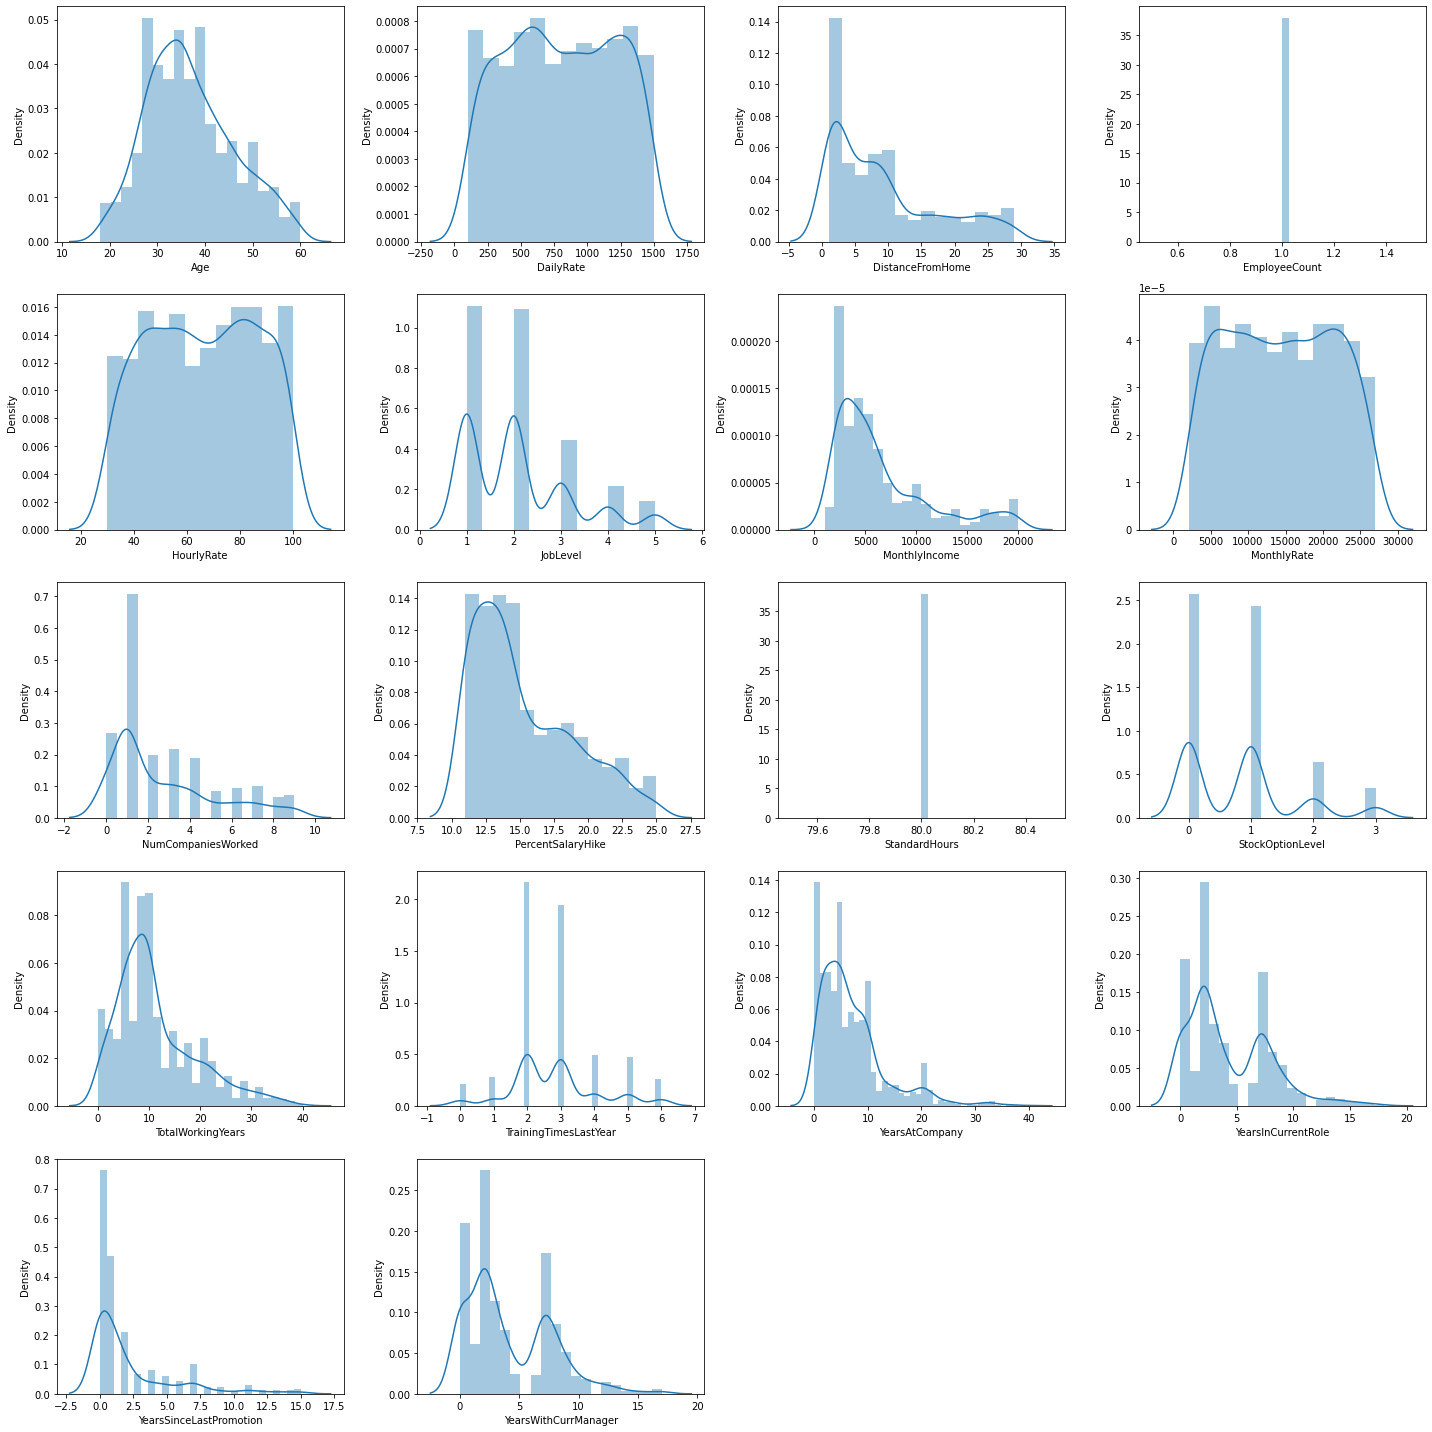

In [13]:
plt.figure(figsize=(20,20))

for index in range(len(numericCols)):
    plt.subplot(5,4,index+1)
    sns.distplot(employeeDf[numericCols[index]])
    plt.tight_layout()

From the above graphs we see that, while Age is following a normal distribution, none of the other columns are following this distribution. HourlyRate and MonthlyRate seems to have a flat top while YearsInCurrentRole and YearsWithCurrManager have a bimodal distribution. The rest of the columns seems to have positive skewness.

Also, taking a closer look, StockOptionLevel and JobLevel are discreet and behaves like categorical column so we will remove for numericCols and add in categoricalCols.

In [14]:
categoricalCols.extend(['StockOptionLevel', 'JobLevel'])

In [15]:
for values in ['StockOptionLevel', 'JobLevel']:
    numericCols.remove(values)

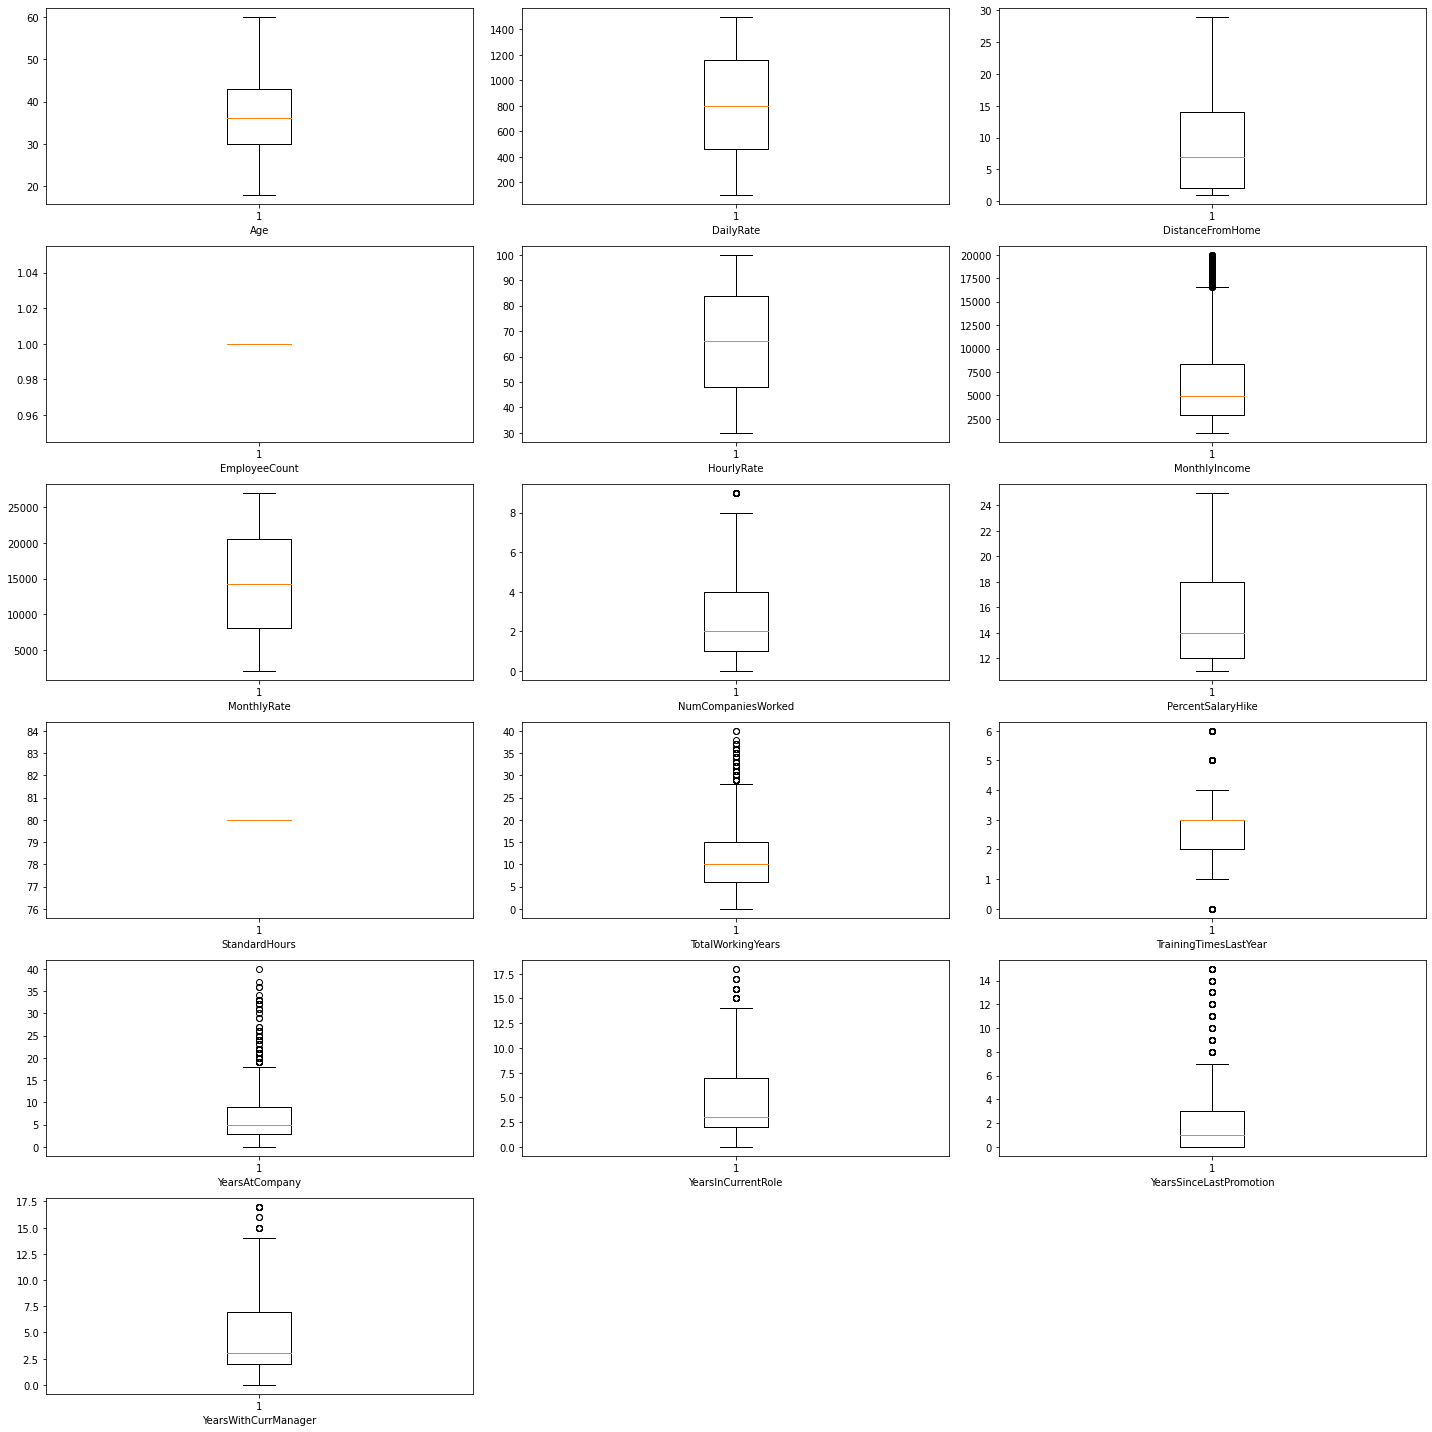

In [16]:
plt.figure(figsize=(20,20))

for index in range(len(numericCols)):
    plt.subplot(6,3,index+1)
    plt.boxplot(employeeDf[numericCols[index]])
    plt.xlabel(numericCols[index])
    plt.tight_layout()

The columns have MonthlyRate, NumCompaniesWorked, TotalWorkingYears, TrainingTimeLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager have outliers.

Also, we see that the column 'EmployeeCount' has only one value for all rows. Therefore it is useless and will be dropped.

In [17]:
numericCols.remove('EmployeeCount')
employeeDf.drop('EmployeeCount', axis = 1, inplace=True)

In [18]:
employeeDf[numericCols].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
StandardHours              0.000000
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

Some of the columns have skewness of more then 0.5 which is outside acceptable range and needs to be transformed to reduce the skewness. This will be done before analysis.

###### Bivariate Analysis

Categorical Columns with the target variable (which is categorical)

Since this step will require two categorical columns ,we need to perform Chi-square test for independence. This will be done by frist making a Cross Table for each categorical column with the Attrition column one-by-one. Then we find the expected valuesusing this cross tables and then calculate the chi-square statistics and then use this chi-square statistics to calculate the pvalue. We will then consider only those columns which have a pvalue lower then 0.5.

Below we will perform Chi-square test from the column BusinessTravel and Attrition. Then we will make a function to perform this test on rest of the categorical columns.

In [19]:
#Calculating Cross Table
crossTab = pd.crosstab(employeeDf['BusinessTravel'], employeeDf['Attrition'], margins=True, margins_name='Total')
crossTab

Attrition,No,Yes,Total
BusinessTravel,,,
Non-Travel,138,12,150
Travel_Frequently,208,69,277
Travel_Rarely,887,156,1043
Total,1233,237,1470


In [20]:
#Calculating table with observed values
observedVal = crossTab.values
observedVal

array([[ 138,   12,  150],
       [ 208,   69,  277],
       [ 887,  156, 1043],
       [1233,  237, 1470]], dtype=int64)

In [21]:
#Finding the expected values
val=stats.chi2_contingency(crossTab)

#at index 3 the expected value arry is present
expectedVal = val[3]

In [22]:
rowNum = (crossTab.shape[0] - 1) # not considering the 'Total' row
columnNum = (crossTab.shape[1] - 1) # not considering the 'Total' column
#Calculating degrees of freedom
doF=(rowNum-1)*(columnNum-1)
print(f'Degree of Freedom: {doF}')
alpha = 0.05

Degree of Freedom: 2


In [23]:
#Calculating the chi-square statistics
chiSquare=sum([(o-e)**2./e for o,e in zip(observedVal, expectedVal)])

chiSquareStatistic=chiSquare[0]+chiSquare[1]
print(f'Chi-square statistic:-{chiSquareStatistic}')

Chi-square statistic:-24.182413685655174


In [24]:
#Finding the pvalue
pValue=1-stats.chi2.cdf(x=chiSquareStatistic,df=doF)
print(f'p-value: {pValue}')
print(f'Significance level: {alpha}')
print(f'Degree of Freedom: {doF}')
print(f'p-value: {pValue}')

p-value: 5.608614476404483e-06
Significance level: 0.05
Degree of Freedom: 2
p-value: 5.608614476404483e-06


In [25]:
if pValue<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables


In this case, therefore, we see that the two columns have a statistically related and hence will be considered in out model.

Now we will make a function to perform Chi-Square Test of Independence for each of the categorical column with the steps performed above

In [26]:
def chi2IndependenceTest(categoricalColName):
    
    crossTab = pd.crosstab(employeeDf[categoricalColName], employeeDf['Attrition'], margins=True, margins_name='Total')
    observedVal = crossTab.values
    expectedVal = stats.chi2_contingency(crossTab)[3]
    rowNum = (crossTab.shape[0] - 1)
    columnNum = (crossTab.shape[1] - 1)
    doF=(rowNum-1)*(columnNum-1)
    chiSquare=sum([(o-e)**2./e for o,e in zip(observedVal, expectedVal)])
    chiSquareStatistic=chiSquare[0]+chiSquare[1]
    pValue=1-stats.chi2.cdf(x=chiSquareStatistic,df=doF)
    
    return doF, pValue

In [27]:
alpha = 0.05
sigCatCols = [] #List of significant categorical columns

for cols in categoricalCols:
    degreesOfFreedom, pValue = chi2IndependenceTest(cols)
    if pValue<=alpha:
        sigCatCols.append(cols)
        print(f'Reject H0, There is a relationship between {cols} and Attrition')
    else:
        print(f'Retain H0,There is no relationship between {cols} and Attrition')

Reject H0, There is a relationship between BusinessTravel and Attrition
Reject H0, There is a relationship between Department and Attrition
Retain H0,There is no relationship between Education and Attrition
Reject H0, There is a relationship between EducationField and Attrition
Reject H0, There is a relationship between EnvironmentSatisfaction and Attrition
Retain H0,There is no relationship between Gender and Attrition
Reject H0, There is a relationship between JobInvolvement and Attrition
Reject H0, There is a relationship between JobRole and Attrition
Reject H0, There is a relationship between JobSatisfaction and Attrition
Reject H0, There is a relationship between MaritalStatus and Attrition
Retain H0,There is no relationship between Over18 and Attrition
Reject H0, There is a relationship between OverTime and Attrition
Retain H0,There is no relationship between PerformanceRating and Attrition
Retain H0,There is no relationship between RelationshipSatisfaction and Attrition
Reject H

In [28]:
#Printing the significant categorical column
sigCatCols

['BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'WorkLifeBalance',
 'StockOptionLevel',
 'JobLevel']

Numeric Columns with the target variable (which is categorical)

<AxesSubplot:>

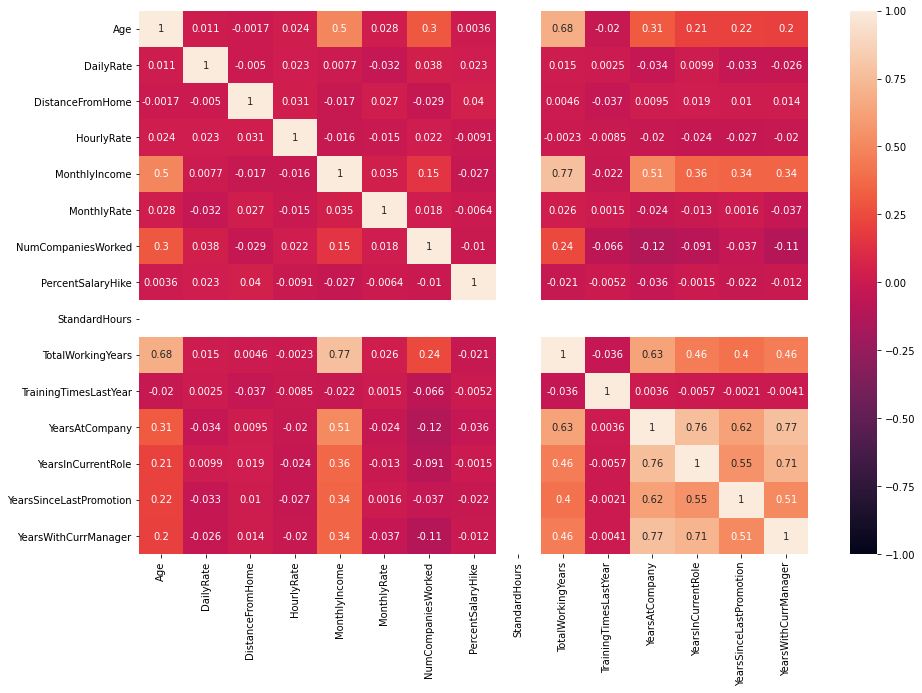

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(employeeDf[numericCols].corr(), vmax = +1, vmin = -1, annot = True)

We see from the heatmap that no columns are very highly correlated with each other and hence there is no multicollinearity.

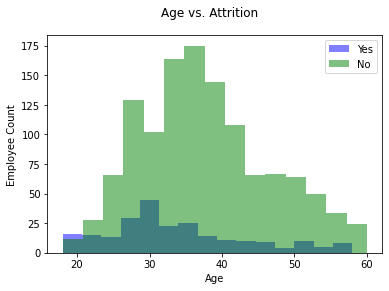

In [30]:
fig, ax = plt.subplots()

ax.hist(employeeDf[employeeDf["Attrition"]=='Yes']["Age"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(employeeDf[employeeDf["Attrition"]=='No']["Age"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("Age")
ax.set_ylabel("Employee Count")

fig.suptitle("Age vs. Attrition")

ax.legend();

We see that those with Attrition as 'No' are mostle around the age of 35-40 and those with Attrition 'Yes' are mostly 30 years old.

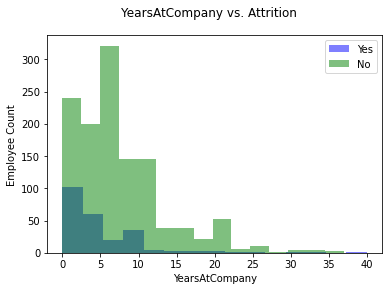

In [31]:
fig, ax = plt.subplots()

ax.hist(employeeDf[employeeDf["Attrition"]=='Yes']["YearsAtCompany"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(employeeDf[employeeDf["Attrition"]=='No']["YearsAtCompany"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("YearsAtCompany")
ax.set_ylabel("Employee Count")

fig.suptitle("YearsAtCompany vs. Attrition")

ax.legend();

We see that those with Attrition as 'No' have been working for mostly 5 years or more and those with Attrition 'Yes' have been with the company for mostly 5 years or less. This suggests that newer employees are more likely to switch jobs.

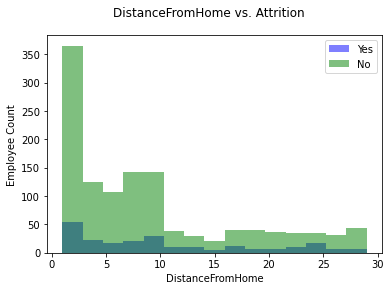

In [32]:
fig, ax = plt.subplots()

ax.hist(employeeDf[employeeDf["Attrition"]=='Yes']["DistanceFromHome"], bins=15, alpha=0.5, color="blue", label="Yes")
ax.hist(employeeDf[employeeDf["Attrition"]=='No']["DistanceFromHome"], bins=15, alpha=0.5, color="green", label="No")

ax.set_xlabel("DistanceFromHome")
ax.set_ylabel("Employee Count")

fig.suptitle("DistanceFromHome vs. Attrition")

ax.legend();

We see that DistanceFromHome have more or less the same characteristics for employees regardless of the Attrition label 'Yes' or 'No'.

## Analysis <a name = "analysis"></a>

In [33]:
#Making a function to detect outliers using the IQR method and then replacing them with the upper and lower bridge values
def outlierRemoverS(data, col):
    '''Note: This function is for skewed data only'''
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lowerBridge = data[col].quantile(0.25) - (1.5*IQR)
    upperBridge = data[col].quantile(0.75) + (1.5*IQR)
    if lowerBridge >=0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=lowerBridge, col] = lowerBridge
    elif lowerBridge < 0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=0, col] = data[col].quantile(0.5)

In [34]:
#Applying the above function on each numeric columns to handle the outliers
for index in range(len(numericCols)):
    outlierRemoverS(employeeDf, numericCols[index])

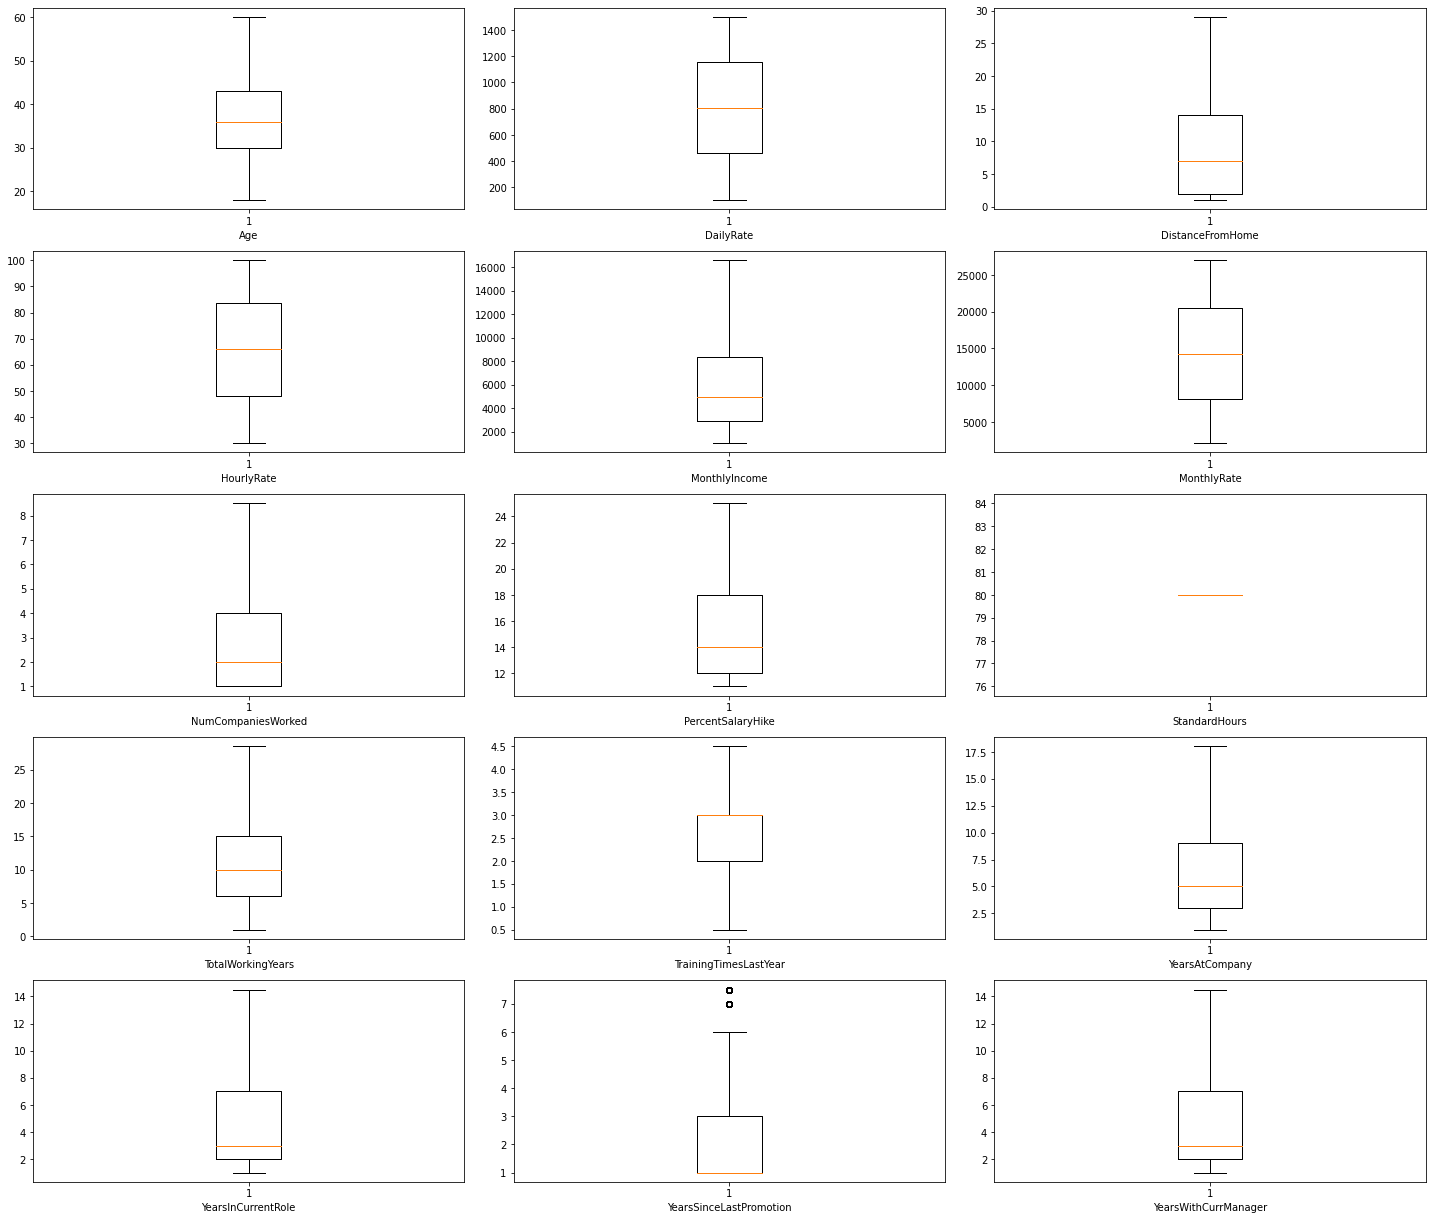

In [35]:
#Checking outliers after treating them
plt.figure(figsize=(20,20))

for index in range(len(numericCols)):
    plt.subplot(6,3,index+1)
    plt.boxplot(employeeDf[numericCols[index]])
    plt.xlabel(numericCols[index])
    plt.tight_layout()

The outliers have been treated correcty and are no longer present in the dataset

In [36]:
#Checking skewness
employeeDf[numericCols].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.168595
MonthlyRate                0.018578
NumCompaniesWorked         1.127236
PercentSalaryHike          0.821128
StandardHours              0.000000
TotalWorkingYears          0.874090
TrainingTimesLastYear      0.117931
YearsAtCompany             0.955503
YearsInCurrentRole         1.113062
YearsSinceLastPromotion    1.483049
YearsWithCurrManager       1.036059
dtype: float64

Applying various tranformation on each column to remove skewness

In [37]:
employeeDf['DistanceFromHome'] = np.log(employeeDf['DistanceFromHome'])
employeeDf['DistanceFromHome'].skew()

-0.2460041611908789

In [38]:
employeeDf['MonthlyIncome'] = np.log(employeeDf['MonthlyIncome'])
employeeDf['MonthlyIncome'].skew()

0.2107765788288627

In [39]:
employeeDf['NumCompaniesWorked'] = np.log(employeeDf['NumCompaniesWorked'])
employeeDf['NumCompaniesWorked'].skew()

0.3258832050597781

In [40]:
employeeDf['PercentSalaryHike'] = np.log(employeeDf['PercentSalaryHike'])
employeeDf['PercentSalaryHike'].skew()

0.49456573432366174

In [41]:
employeeDf['TotalWorkingYears'] = (employeeDf['TotalWorkingYears'])**(1/2)
employeeDf['TotalWorkingYears'].skew()

0.14921652640643715

In [42]:
employeeDf['YearsAtCompany'] = np.log(employeeDf['YearsAtCompany'])
employeeDf['YearsAtCompany'].skew()

-0.4720297508060555

In [43]:
employeeDf['YearsInCurrentRole'] = np.log(employeeDf['YearsInCurrentRole'])
employeeDf['YearsInCurrentRole'].skew()

0.1318683487660016

In [44]:
from scipy.stats import boxcox
employeeDf['YearsSinceLastPromotion'] = boxcox(employeeDf['YearsSinceLastPromotion'])[0]
employeeDf['YearsSinceLastPromotion'].skew()

0.6908927990261224

In [45]:
employeeDf['YearsWithCurrManager'] = np.log(employeeDf['YearsWithCurrManager'])
employeeDf['YearsWithCurrManager'].skew()

0.06060237416580734

In [46]:
#Label encoding the target column by making a new column and the placing
# 1 for no and 2 for yes in the new column
employeeDf['AttritionEncoded'] = 1
employeeDf.loc[employeeDf['Attrition'] == 'Yes', 'AttritionEncoded'] = 2
employeeDf['AttritionEncoded']

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: AttritionEncoded, Length: 1470, dtype: int64

In [47]:
#Dropping the old target column as we will use the column we made above as the target column
employeeDf.drop('Attrition', axis = 1, inplace = True)

In [48]:
#Seperating the x and y
x = employeeDf.drop('AttritionEncoded', axis = 1)
y = employeeDf.AttritionEncoded

In [49]:
#making a column transformer to perform standard scaling on numeric columns, one hot encoding on categorical columns and label encoder in target column
colTrans = make_column_transformer((StandardScaler(), numericCols),(OneHotEncoder(), sigCatCols), remainder='drop') 
x = colTrans.fit_transform(x)

In [50]:
#Finding the best random state
maxAcc = 0
maxRs = 0
for randState in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=randState)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc = lr.score(x_test, y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {maxAcc*100}% on Random state {randState}")

Best accuracy is 92.7437641723356% on Random state 199


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=199)

In [52]:
#Oversampling to balance the dataset

ros = RandomOverSampler(random_state = 42)
xResampled, yResampled = ros.fit_resample(x_train, y_train)

print(f'Before Resampling\n{y_train.value_counts()}\nAfter Resampling:\n{yResampled.value_counts()}')

Before Resampling
1    858
2    171
Name: AttritionEncoded, dtype: int64
After Resampling:
1    858
2    858
Name: AttritionEncoded, dtype: int64


In [53]:
#Training various classification models and checking their accuracies
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier() 
svc = SVC() 
knc = KNeighborsClassifier()
adc = AdaBoostClassifier()

models = [lr, rfc, dtc, svc, knc, adc]

for model in models:
    model.fit(xResampled, yResampled)
    pred = model.predict(x_test)
    print(f'\t{model}\nConfusion Matrix:\n{confusion_matrix(y_test, pred)}\n')
    print(f'Classification Report:\n{classification_report(y_test, pred)}\n')
    print(f'F1 Score: \n{f1_score(y_test, pred)}\n')
    print(f'Accuracy Score: {accuracy_score(y_test, pred)}\n')

	LogisticRegression()
Confusion Matrix:
[[296  79]
 [ 21  45]]

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.79      0.86       375
           2       0.36      0.68      0.47        66

    accuracy                           0.77       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.85      0.77      0.80       441


F1 Score: 
0.8554913294797687

Accuracy Score: 0.7732426303854876

	RandomForestClassifier()
Confusion Matrix:
[[366   9]
 [ 48  18]]

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.98      0.93       375
           2       0.67      0.27      0.39        66

    accuracy                           0.87       441
   macro avg       0.78      0.62      0.66       441
weighted avg       0.85      0.87      0.85       441


F1 Score: 
0.9277566539923955

Accuracy Score: 0.8707482993197279

	DecisionTreeClassifier()
Confus

In [54]:
lrCV = cross_val_score(lr , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {lrCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.7619047619047619 - lrCV.mean()}')

Cross val score is: 0.8129347752389993
Accuracy and Cross Validation Score difference: -0.0510300133342374


In [55]:
rfcCV = cross_val_score(rfc , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {rfcCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.8639455782312925 - rfcCV.mean()}')

Cross val score is: 0.9761119397925283
Accuracy and Cross Validation Score difference: -0.11216636156123583


In [56]:
dtcCV = cross_val_score(dtc , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {dtcCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.7777777777777778 - dtcCV.mean()}')

Cross val score is: 0.9131669943724997
Accuracy and Cross Validation Score difference: -0.13538921659472192


In [57]:
svcCV = cross_val_score(svc , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {svcCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.8639455782312925 - svcCV.mean()}')

Cross val score is: 0.925406807241169
Accuracy and Cross Validation Score difference: -0.061461229009876495


In [58]:
kncCV = cross_val_score(knc , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {kncCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.691609977324263 - kncCV.mean()}')

Cross val score is: 0.8024476235676994
Accuracy and Cross Validation Score difference: -0.1108376462434364


In [59]:
adcCV = cross_val_score(adc , xResampled, yResampled, cv = 5)
print(f'Cross val score is: {adcCV.mean()}')
print(f'Accuracy and Cross Validation Score difference: {0.7845804988662132 - adcCV.mean()}')

Cross val score is: 0.8280866499423689
Accuracy and Cross Validation Score difference: -0.04350615107615574


We see that the score difference for DecisionTreeClassifier is -0.1348027361553702 which means that after cross validation, the score went up by 0.1348027361553702 which is better then any other model and hence it will be our final model.

## Hyperparameter Tuning and Model Saving<a name = "hyperparam"></a>

In [60]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
             'max_depth': [None, 5, 10, 15, 20, 50, 100, 150, 200, 500, 1000, 10000],
             'max_features': ['auto', 'sqrt', 'log2']}

In [61]:
gs = GridSearchCV(dtc, param_grid = parameters, cv = 5, n_jobs = -1)

In [62]:
gs.fit(xResampled, yResampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 50, 100, 150, 200,
                                       500, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [63]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 200,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [67]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 200, max_features = 'sqrt', splitter = 'random')

In [68]:
dtc.fit(xResampled, yResampled)
pred = dtc.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test, pred)}\n')

Accuracy Score: 0.7936507936507936



Therefore, using cross-validation and hyper-parameter tuning we were able to increase the accuracy score to 0.7936507936507936 from 0.7845804988662132.

In [69]:
#Model saving
joblib.dump(dtc, 'employee.pkl')

model = joblib.load('employee.pkl')
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,